In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import bokeh
import scipy.stats  as stats
import statsmodels.formula.api as smf
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from scipy.stats import shapiro

In [2]:
data = pd.read_csv("Banco.csv", sep=";")
data = pd.read_excel("Banco.xlsx")

## Profiling

In [3]:
data.head()
data.shape
pandas_profiling.ProfileReport(data)
data.dtypes

ID                   int64
LIMITE_CREDITO       int64
SEXO                object
NIVEL_EDUCATIVO     object
ESTADO_CIVIL        object
EDAD                 int64
INGRESOS           float64
PAGO_ANTERIOR        int64
dtype: object

## Data type transformation

In [4]:
data_types = {'NIVEL_EDUCATIVO':str, 'NIVEL_EDUCATIVO':str}
parse_dates = ['INGRESOS']
data_transformend= pd.read_excel("Banco.xlsx",dtype = data_types, parse_dates = parse_dates)

data_rename = data.rename(columns={"INGRESOS": "SALARIO", "LIMITE_CREDITO": "CUPO_CREDITO"})
data.NIVEL_EDUCATIVO = data.NIVEL_EDUCATIVO.astype(str)
data.INGRESOS = pd.to_numeric(data.INGRESOS)
data_binary = pd.get_dummies(data.NIVEL_EDUCATIVO)


data_series = data[['INGRESOS','LIMITE_CREDITO']].values
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data_series)
data_dataframe = pd.DataFrame(data_normalized)

## Extracción de información de campo fecha
data.FECHA = pd.to_datetime(data.FECHA)
data.created_at.dt.year
data.created_at.dt.month
data.created_at.dt.day
data.created_at.dt.minute
## The day of the week with Monday=0, Sunday=6.
data.created_at.dt.dayofweek
data.NIVEL_EDUCATIVO.apply(str)

### Permutation

In [7]:
from itertools import permutations 
  
perm = permutations([1, 2, 3]) 
lista = []
for i in list(perm): 
    lista.append(i)
lista

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [8]:
perm = permutations([1, 2, 3], 2) 
  
lista = []
for i in list(perm): 
    lista.append(i)
lista

[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]

In [23]:
from itertools import permutations

values = ['ABCD','3']
final = list(permutations(values[0],int(values[1])))
final.sort()
final_data = [''.join(w) for w in final] #Concatenando los valores de la tupla
final_data

for i in range(0,len(final)):
    print(final_data[i])

ABC
ABD
ACB
ACD
ADB
ADC
BAC
BAD
BCA
BCD
BDA
BDC
CAB
CAD
CBA
CBD
CDA
CDB
DAB
DAC
DBA
DBC
DCA
DCB


In [75]:
from itertools import combinations

values = ['HACK','2']
test = list(values[0])
test.sort()
test = ''.join(test)
values[0] = test

final = []
for i in range(1,int(values[1])+1):
    temp = list(combinations(values[0],i))
    temp = [''.join(w) for w in temp]
    temp.sort()
    final += temp 
print(final)

for i in range(0,len(final)):
    print(final[i])

['A', 'C', 'H', 'K', 'AC', 'AH', 'AK', 'CH', 'CK', 'HK']
A
C
H
K
AC
AH
AK
CH
CK
HK


### Combination

In [12]:
from itertools import combinations 

comb = combinations([1, 2, 3], 2) 
# El orden de los elementos es importante, puede cambiar el conjunto de elementos resultantes
# Si hay elementos repetidos se genera un nuevo elemento de todas formas, por ejemplo: (1,1),(2,2)

lista = []
for i in list(comb): 
    lista.append(i)
lista

[(1, 2), (1, 3), (2, 3)]

### Producto cartesiano

In [16]:
from itertools import product

prod = product('ABCD', repeat=2)
lista = []
for i in list(prod): 
    lista.append(i)
lista

[('A', 'A'),
 ('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('B', 'A'),
 ('B', 'B'),
 ('B', 'C'),
 ('B', 'D'),
 ('C', 'A'),
 ('C', 'B'),
 ('C', 'C'),
 ('C', 'D'),
 ('D', 'A'),
 ('D', 'B'),
 ('D', 'C'),
 ('D', 'D')]

In [17]:
from itertools import combinations_with_replacement 
  
comb = combinations_with_replacement([1, 2, 3], 2) 
  
lista = []
for i in list(comb): 
    lista.append(i)
lista

[(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]

## Statistical operations

In [5]:
data.NIVEL_EDUCATIVO.mode()
data_groupby = data.groupby(['SEXO','NIVEL_EDUCATIVO']).size()
data.INGRESOS.sort_values(ascending=False).head()
data.INGRESOS.max()
data.INGRESOS.median()
data.NIVEL_EDUCATIVO.unique()

array(['PREGRADO', 'POSGRADO', 'BACHILLERATO', 'PRIMARIA'], dtype=object)

In [6]:
# Series to dataframe
data_series_to_dataframe = data_groupby.to_frame()
data_series_to_dataframe.sort_values(by=0, ascending=False)

0
SEXO   NIVEL_EDUCATIVO      
MUJER  PREGRADO         8690
       POSGRADO         6393
HOMBRE PREGRADO         5405
       POSGRADO         4438
MUJER  BACHILLERATO     2948
HOMBRE BACHILLERATO     2003
MUJER  PRIMARIA           81
HOMBRE PRIMARIA           42

## Data selection

In [7]:
## Agregando nueva columna con valor default
df['My new column'] = 'default value'
column_selection = data[['NIVEL_EDUCATIVO', 'NIVEL_EDUCATIVO']]
filter_data = data[(data.NIVEL_EDUCATIVO == 'PREGRADO') & (data.ESTADO_CIVIL == 'SOLTERO')]
data_numeric = data.select_dtypes(include = ['float64','int64'])
data_numeric = data.select_dtypes(include = ['number'])
data_nominal = data.select_dtypes(exclude = ['number'])
data = data.drop(['order_id'], axis=1)
X = data.loc[:, data.columns != 'label']

## Manage duplicates

In [8]:
data.duplicated().sum()
data = data.drop_duplicates()

## Join and merge

In [ ]:
pd.concat([s1, s2])
data_join = data.merge(data_2, on='ID_KEY_VALUE', how='left')

## Data cleanse

In [9]:
data.set_value(328,'NIVEL_EDUCATIVO','PRÉGRADO')
data_substring = data['NIVEL_EDUCATIVO'].str[:3]
data = data.replace(to_replace='PRÉGRADO',value='PREGRADO')
data.NIVEL_EDUCATIVO = data.NIVEL_EDUCATIVO.replace('CADENA', 'REEMPLAZO')
data_replace = data.NIVEL_EDUCATIVO.map({'PREGRADO':'PROFESIONAL','POSGRADO':'POSGRADO','BACHILLERATO':'BACHILLERATO'})

C:\Users\co1012351486\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


## Data Visualization

In [10]:
## Diagrama Pie
day_of_week_non_taken.day_of_week.value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.0f%%')
## Diagrama de barras
day_of_week_non_taken.day_of_week.value_counts().plot(kind='bar',figsize=(6,6))
data.pivot_table(values = 'INGRESOS', columns = 'NIVEL_EDUCATIVO', aggfunc = np.mean)

NIVEL_EDUCATIVO,BACHILLERATO,POSGRADO,PREGRADO,PRIMARIA
INGRESOS,51196.72471,86248.9361,59052.220739,88523.179919


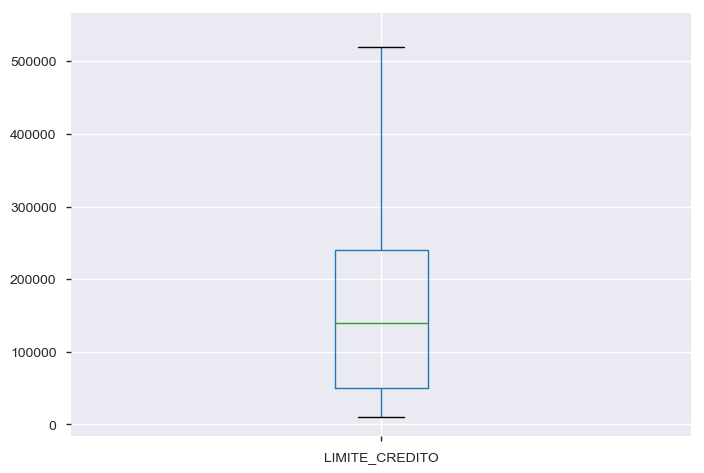

In [11]:
data = data[np.abs(data.LIMITE_CREDITO - data.LIMITE_CREDITO.mean()) <= ( 3 * data.LIMITE_CREDITO.std())]
data = data[~(np.abs(data.LIMITE_CREDITO - data.LIMITE_CREDITO.mean()) > (3 * data.LIMITE_CREDITO.std()))]

data = data[np.abs(data.INGRESOS - data.INGRESOS.mean()) <= ( 3 * data.INGRESOS.std())]
data = data[~(np.abs(data.INGRESOS - data.INGRESOS.mean()) > (3 * data.INGRESOS.std()))]

data.boxplot('LIMITE_CREDITO')

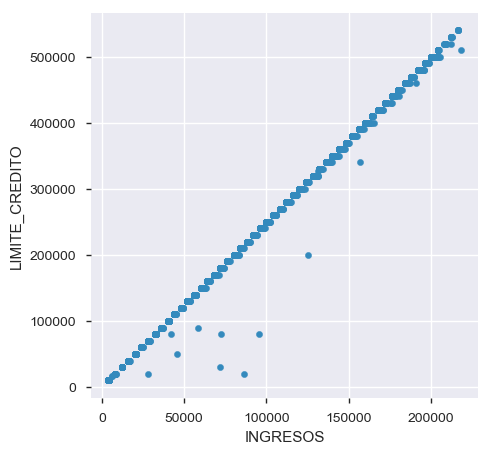

In [12]:
data.plot(x='INGRESOS',y='LIMITE_CREDITO',kind='scatter',figsize=(5,5))

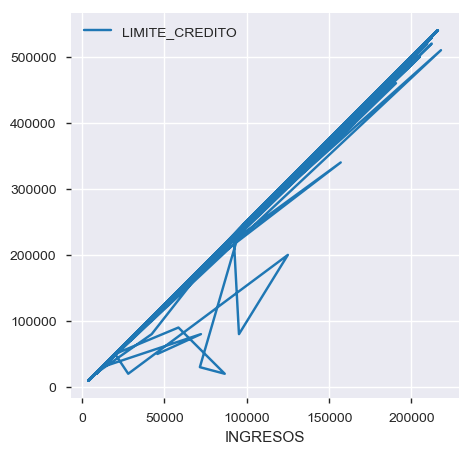

In [13]:
data.plot(x='INGRESOS',y='LIMITE_CREDITO',kind='line',figsize=(5,5))

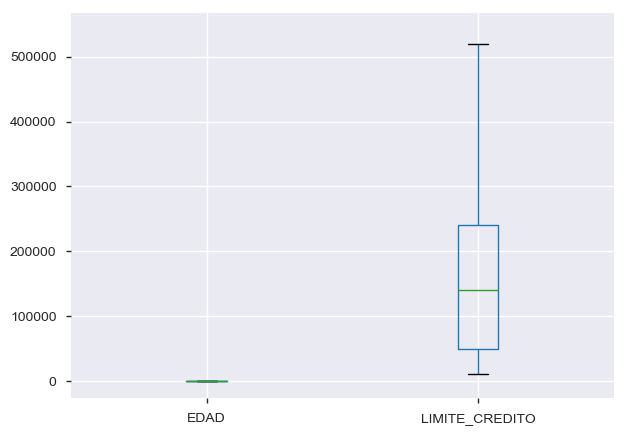

In [14]:
data[['EDAD','LIMITE_CREDITO']].plot(kind='box',figsize=(7,5))

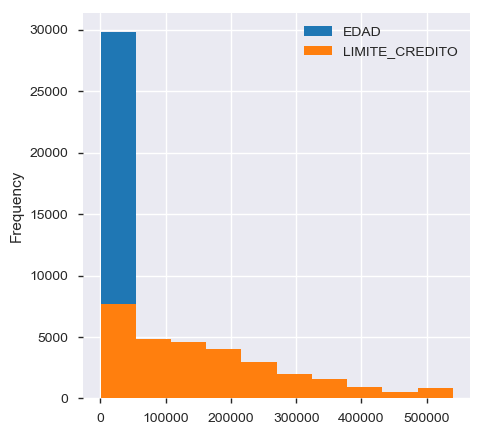

In [15]:
data[['EDAD','LIMITE_CREDITO']].plot(kind='hist',figsize=(5,5))

In [16]:
#data[['EDAD','LIMITE_CREDITO']].plot(kind='bar',figsize=(5,5))

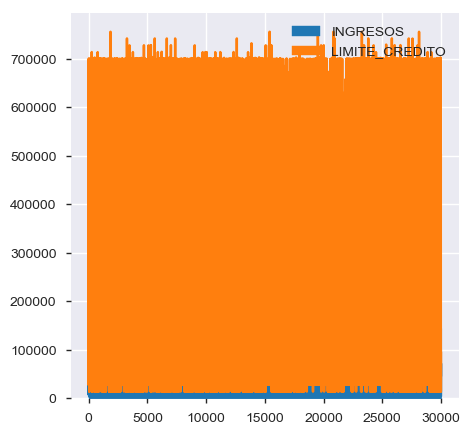

In [17]:
data[['INGRESOS','LIMITE_CREDITO']].plot(kind='area',figsize=(5,5))

C:\Users\co1012351486\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\co1012351486\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


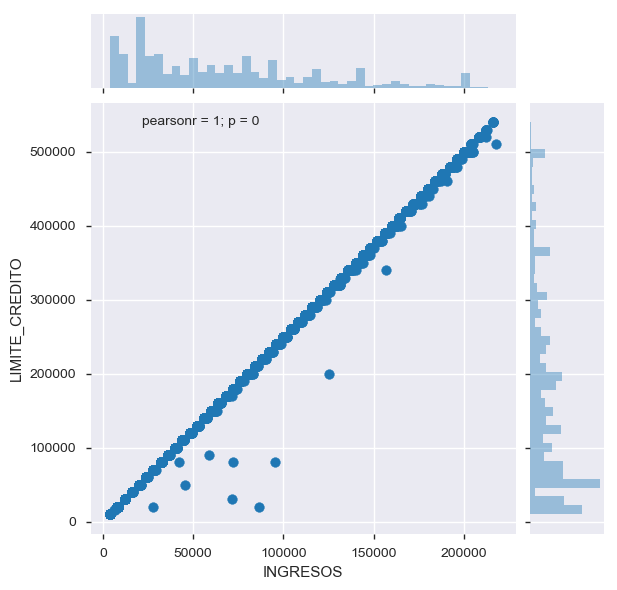

In [18]:
#data.plot(x='INGRESOS',y='LIMITE_CREDITO',kind='barh',figsize=(5,5))
sns.jointplot(x='INGRESOS', y="LIMITE_CREDITO", data = data)

## Correlation functions

#### Numerical - Numerical

In [19]:
stats.spearmanr(data['LIMITE_CREDITO'], data['EDAD'])

SpearmanrResult(correlation=0.18465799195833796, pvalue=4.370053752859679e-227)

In [20]:
stats.pearsonr(data['LIMITE_CREDITO'], data['EDAD'])

(0.14226092409765884, 1.136389133901491e-134)

#### Numerical - Categorical

In [26]:
anova = smf.ols(formula='LIMITE_CREDITO ~ ESTADO_CIVIL', data=data).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LIMITE_CREDITO   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     133.6
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           5.26e-86
Time:                        20:19:20   Log-Likelihood:            -3.9248e+05
No. Observations:               29836   AIC:                         7.850e+05
Df Residuals:                   29832   BIC:                         7.850e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1.796e+05   1072.393    167.509      0.000    1.78e+05    1.82e+05
ESTADO_CIVIL[T.SOLTERO]     -2.543e+04   1460.438    -17.411      0.000   -2.83e+04   -2.26e+04
ESTADO_CIVIL[T.UNION_LIBRE] -8.156e+04   7034.432    -11.594      0.000   -9.53e+04   -6.78e+04
ESTADO_CIVIL[T.VIUDO]       -4.667e+04    1.7e+04     -2.740      0.006   -8.01e+04   -1.33e+04
==============================================================================
Omnibus:                     2900.159   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3845.129
Skew:                           0.879   Prob(JB):                         0.00
Kurtosis:                       3.057   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Categorical - Categorical

In [22]:
tabla = pd.crosstab(index = data.NIVEL_EDUCATIVO,columns = data.ESTADO_CIVIL, margins=True)
tabla

ESTADO_CIVIL,CASADO,SOLTERO,UNION_LIBRE,VIUDO,All
NIVEL_EDUCATIVO,,,,,
BACHILLERATO,2872,1914,103,44,4933
POSGRADO,3815,6867,53,4,10739
PREGRADO,6836,7036,164,6,14042
PRIMARIA,52,67,3,0,122
All,13575,15884,323,54,29836


In [23]:
chi2_contingency(tabla)

(1140.7203900313193,
 7.79259381012229e-233,
 16,
 array([[2.24445217e+03, 2.62621571e+03, 5.34039080e+01, 8.92820753e+00,
         4.93300000e+03],
        [4.88610822e+03, 5.71719654e+03, 1.16258781e+02, 1.94364526e+01,
         1.07390000e+04],
        [6.38893116e+03, 7.47563775e+03, 1.52016557e+02, 2.54145328e+01,
         1.40420000e+04],
        [5.55084462e+01, 6.49499933e+01, 1.32075345e+00, 2.20807079e-01,
         1.22000000e+02],
        [1.35750000e+04, 1.58840000e+04, 3.23000000e+02, 5.40000000e+01,
         2.98360000e+04]]))

## Statistical distribution

C:\Users\co1012351486\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


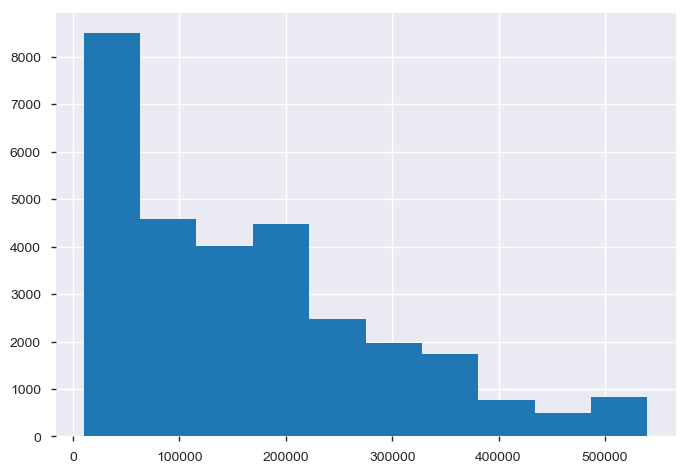

In [24]:
stat, p = shapiro(data['LIMITE_CREDITO'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
data['LIMITE_CREDITO'].hist();